<img src = "https://www.bits-pilani.ac.in/Uploads/Campus/BITS_university_logo.gif">

<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>

<h2>Group No: 106</h2>

<table>
  <tr>
    <th>Full Name</th>
    <th>BITS ID</th>
  </tr>
  <tr>
    <td>Varshini M</td>
    <td>2021FC04149</td>
  </tr>
  <tr>
    <td>Shah Abhishek Rajesh</td>
    <td>2021FC04153</td>
  </tr>
  <tr>
    <td>Ritresh Girdhar</td>
    <td>2021FC04145</td>
  </tr>
    <tr>
    <td>Subhi Singh</td>
    <td>2021FC04061</td>
  </tr>
</table>


___
# Question and Answer Chat Bots

----

------

## Loading the Data

We will be working with the Babi Data Set from Facebook Research.

Full Details: https://research.fb.com/downloads/babi/

- Jason Weston, Antoine Bordes, Sumit Chopra, Tomas Mikolov, Alexander M. Rush,
  "Towards AI-Complete Question Answering: A Set of Prerequisite Toy Tasks",
  http://arxiv.org/abs/1502.05698


Install required libraries

In [142]:
!pip install keras
!pip install tensorflow
!pip install Keras-Preprocessing
!pip install embeddings
!pip install keras-pos-embd

In [145]:
pip show tensorflow

Name: tensorflow
Version: 2.11.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /Users/ritgirdh/opt/anaconda3/lib/python3.9/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [146]:
import pickle
import numpy as np

In [147]:
# Keras library imports for tokenization and model building
from keras_preprocessing.sequence import pad_sequences
from keras_preprocessing.text import Tokenizer
from keras.models import Sequential, Model
from keras.layers import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout
from keras.layers import add, dot, concatenate
from keras.layers import LSTM
from keras.layers import Embedding

Q1. Write code to unpickle the train_qa and test_qa datasets below

In [148]:
# Unpickling training and test dataset
with open('train_qa.txt', 'rb') as f:
    train_data = pickle.load(f)
    
with open('test_qa.txt', 'rb') as f:
    test_data = pickle.load(f)    

----

## Exploring the Format of the Data

Q2. Identify the type of traindata and test data

In [149]:
#type of train data
type(train_data)

list

In [150]:
#type of test data
type(test_data)

list

Q3. Identify the length of test and train data

In [151]:
#length of train data
len(train_data)

10000

In [152]:
#length of test data
len(test_data)

1000

Q4. Print the first record in train data and print the first record as scentences with punctuation marks, separate the question and the answer

In [153]:
# first entry in the train data
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [154]:
#Separate the question 
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [155]:
#separate the Answer 
train_data[0][2]

'no'

-----

## Setting up Vocabulary of All Words

Q5. fill the code where ever required

In [156]:
vocab = set()

In [157]:
#concatenate the train and test data as 'all_data'
all_data = test_data + train_data

for story, question , answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [158]:
for story, question , answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [159]:
vocab.add('no')
vocab.add('yes')

In [160]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [161]:
vocab_len = len(vocab) + 1 #we add an extra space to hold a 0 for Keras's pad_sequences

In [162]:
vocab_len

38

In [163]:
# find the maximum story length
all_story_lens = [len(data[0]) for data in all_data]
max_story_len = (max(all_story_lens))
max_story_len

156

In [164]:
# find the maximum question length
max_question_len = max([len(data[1]) for data in all_data])
max_question_len

6

## Vectorizing the Data

Q6 Vectorize and tokenize the data

In [165]:
# Reserve 0 for pad_sequences
vocab_size = len(vocab) + 1

-----------

In [166]:
from keras_preprocessing.sequence import pad_sequences
from keras_preprocessing.text import Tokenizer

In [167]:
# integer encode sequences of words
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [168]:
word_index = tokenizer.word_index
word_index

{'got': 1,
 'to': 2,
 'went': 3,
 'milk': 4,
 'journeyed': 5,
 'john': 6,
 'is': 7,
 'down': 8,
 'kitchen': 9,
 'garden': 10,
 'took': 11,
 'bathroom': 12,
 'back': 13,
 '?': 14,
 'sandra': 15,
 'dropped': 16,
 'office': 17,
 'football': 18,
 'travelled': 19,
 'no': 20,
 'there': 21,
 'yes': 22,
 'the': 23,
 'left': 24,
 'grabbed': 25,
 'discarded': 26,
 'mary': 27,
 'put': 28,
 'apple': 29,
 'up': 30,
 'daniel': 31,
 'moved': 32,
 '.': 33,
 'bedroom': 34,
 'in': 35,
 'picked': 36,
 'hallway': 37}

In [169]:
train_story_text = []
train_question_text = []
train_answers = []

for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)

In [170]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [171]:
len(train_story_text)

10000

In [172]:
len(train_story_seq)

10000

### Functionalize Vectorization

In [173]:
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len,max_question_len=max_question_len):
    '''
    INPUT: 
    
    data: consisting of Stories,Queries,and Answers
    word_index: word index dictionary from tokenizer
    max_story_len: the length of the longest story (used for pad_sequences function)
    max_question_len: length of the longest question (used for pad_sequences function)


    OUTPUT:
    
    Vectorizes the stories,questions, and answers into padded sequences. We first loop for every story, query , and
    answer in the data. Then we convert the raw words to an word index value. Then we append each set to their appropriate
    output list. Then once we have converted the words to numbers, we pad the sequences so they are all of equal length.
    
    Returns this in the form of a tuple (X,Xq,Y) (padded based on max lengths)
    '''
    
    
    # X = STORIES
    X = []
    # Xq = QUERY/QUESTION
    Xq = []
    # Y = CORRECT ANSWER
    Y = []
    
    
    for story, query, answer in data:
        
        # Grab the word index for every word in story
        x = [word_index[word.lower()] for word in story]
        # Grab the word index for every word in query
        xq = [word_index[word.lower()] for word in query]
        
        # Grab the Answers (either Yes/No so we don't need to use list comprehension here)
        # Index 0 is reserved so we're going to use + 1
        y = np.zeros(len(word_index) + 1)
        
        # Now that y is all zeros and we know its just Yes/No , we can use numpy logic to create this assignment
        #
        y[word_index[answer]] = 1
        
        # Append each set of story,query, and answer to their respective holding lists
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    # Finally, pad the sequences based on their max length so the RNN can be trained on uniformly long sequences.
        
    # RETURN TUPLE FOR UNPACKING
    return (pad_sequences(X, maxlen=max_story_len),pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [174]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [175]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [176]:
inputs_test

array([[ 0,  0,  0, ..., 23, 34, 33],
       [ 0,  0,  0, ..., 23, 10, 33],
       [ 0,  0,  0, ..., 23, 10, 33],
       ...,
       [ 0,  0,  0, ..., 23, 29, 33],
       [ 0,  0,  0, ..., 23, 10, 33],
       [ 0,  0,  0, ..., 29, 21, 33]], dtype=int32)

In [177]:
queries_test

array([[ 7,  6, 35, 23,  9, 14],
       [ 7,  6, 35, 23,  9, 14],
       [ 7,  6, 35, 23, 10, 14],
       ...,
       [ 7, 27, 35, 23, 34, 14],
       [ 7, 15, 35, 23, 10, 14],
       [ 7, 27, 35, 23, 10, 14]], dtype=int32)

In [178]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [179]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 503.,   0.,
       497.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [180]:
tokenizer.word_index['yes']

22

In [181]:
tokenizer.word_index['no']

20

## Creating the Model

In [182]:
from keras.models import Sequential, Model
from keras.layers import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout
from keras.layers import add, dot, concatenate
from keras.layers import LSTM

### Placeholders for Inputs

Recall we technically have two inputs, stories and questions. So we need to use placeholders. `Input()` is used to instantiate a Keras tensor.


In [183]:
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

### Building the Networks

To understand why we chose this setup, make sure to read the paper we are using:

* Sainbayar Sukhbaatar, Arthur Szlam, Jason Weston, Rob Fergus,
  "End-To-End Memory Networks",
  http://arxiv.org/abs/1503.08895

## Encoders
Q7 Create the layers as per the instructions given in the problem statement

### Input Encoder m

In [184]:
#### Input gets embedded to a sequence of vectors
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_len,output_dim = 64)) #From paper
input_encoder_m.add(Dropout(0.3))
####This encoder will output:
#### (samples, story_maxlen, embedding_dim)

### Input Encoder c

In [185]:
# embed the input into a sequence of vectors of size query_maxlen
# Follow the instructions in the problem statement
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_len,output_dim = max_question_len)) #From paper
input_encoder_c.add(Dropout(0.3))

# output: (samples, story_maxlen, query_maxlen)

### Question Encoder

In [186]:
# embed the question into a sequence of vectors
# Follow the instructions in the problem statement
# output: (samples, query_maxlen, embedding_dim)
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_len,output_dim = 64,input_length=max_question_len)) #From paper
question_encoder.add(Dropout(0.3))

### Encode the Sequences

In [187]:
# encode input sequence and questions (which are indices)
# to sequences of dense vectors
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

##### Use dot product to compute the match between first input vector seq and the query

In [188]:
# shape: `(samples, story_maxlen, query_maxlen)`
match = dot([input_encoded_m, question_encoded], axes=(2, 2))
match = Activation('softmax')(match)

#### Add this match matrix with the second input vector sequence

In [189]:
# add the match matrix with the second input vector sequence
response = add([match, input_encoded_c])  # (samples, story_maxlen, query_maxlen)
response = Permute((2, 1))(response)  # (samples, query_maxlen, story_maxlen)

#### Concatenate

In [190]:
# concatenate the match matrix with the question vector sequence
answer = concatenate([response, question_encoded])

In [191]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate_1')>

In [192]:
# Reduce with RNN (LSTM)
answer = LSTM(32)(answer)  # (samples, 32)

In [193]:
# Regularization with Dropout
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)  # (samples, vocab_size)

In [194]:
# we output a probability distribution over the vocabulary
answer = Activation('softmax')(answer)

# build the final model
model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [195]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential_3 (Sequential)      (None, None, 64)     2432        ['input_3[0][0]']                
                                                                                                  
 sequential_5 (Sequential)      (None, 6, 64)        2432        ['input_4[0][0]']                
                                                                                            

In [211]:
# train
history = model.fit([inputs_train, queries_train], answers_train,batch_size=32,epochs=120,validation_data=([inputs_test, queries_test], answers_test))

Epoch 1/120
313/313 [==============================] - 3s 8ms/step - loss: 0.3205 - accuracy: 0.8669 - val_loss: 0.3760 - val_accuracy: 0.8410
Epoch 2/120
313/313 [==============================] - 3s 8ms/step - loss: 0.3206 - accuracy: 0.8631 - val_loss: 0.3784 - val_accuracy: 0.8260
Epoch 3/120
313/313 [==============================] - 3s 9ms/step - loss: 0.3180 - accuracy: 0.8691 - val_loss: 0.3833 - val_accuracy: 0.8300
Epoch 4/120
313/313 [==============================] - 3s 9ms/step - loss: 0.3167 - accuracy: 0.8704 - val_loss: 0.3878 - val_accuracy: 0.8350
Epoch 5/120
313/313 [==============================] - 3s 9ms/step - loss: 0.3142 - accuracy: 0.8670 - val_loss: 0.3824 - val_accuracy: 0.8370
Epoch 6/120
313/313 [==============================] - 3s 8ms/step - loss: 0.3116 - accuracy: 0.8729 - val_loss: 0.4026 - val_accuracy: 0.8380
Epoch 7/120
313/313 [==============================] - 3s 8ms/step - loss: 0.3086 - accuracy: 0.8722 - val_loss: 0.3864 - val_accuracy: 0.8340

Epoch 58/120
313/313 [==============================] - 2s 8ms/step - loss: 0.2509 - accuracy: 0.8950 - val_loss: 0.4831 - val_accuracy: 0.8310
Epoch 59/120
313/313 [==============================] - 2s 8ms/step - loss: 0.2502 - accuracy: 0.8976 - val_loss: 0.4460 - val_accuracy: 0.8280
Epoch 60/120
313/313 [==============================] - 2s 8ms/step - loss: 0.2496 - accuracy: 0.8991 - val_loss: 0.5035 - val_accuracy: 0.8310
Epoch 61/120
313/313 [==============================] - 2s 8ms/step - loss: 0.2443 - accuracy: 0.8993 - val_loss: 0.4860 - val_accuracy: 0.8210
Epoch 62/120
313/313 [==============================] - 2s 8ms/step - loss: 0.2550 - accuracy: 0.8976 - val_loss: 0.5087 - val_accuracy: 0.8250
Epoch 63/120
313/313 [==============================] - 2s 7ms/step - loss: 0.2467 - accuracy: 0.9001 - val_loss: 0.5186 - val_accuracy: 0.8270
Epoch 64/120
313/313 [==============================] - 2s 7ms/step - loss: 0.2513 - accuracy: 0.8970 - val_loss: 0.4722 - val_accuracy:

Epoch 115/120
313/313 [==============================] - 3s 8ms/step - loss: 0.2067 - accuracy: 0.9202 - val_loss: 0.5547 - val_accuracy: 0.8160
Epoch 116/120
313/313 [==============================] - 3s 9ms/step - loss: 0.2113 - accuracy: 0.9155 - val_loss: 0.5106 - val_accuracy: 0.8130
Epoch 117/120
313/313 [==============================] - 3s 9ms/step - loss: 0.2061 - accuracy: 0.9181 - val_loss: 0.5828 - val_accuracy: 0.8190
Epoch 118/120
313/313 [==============================] - 3s 9ms/step - loss: 0.2096 - accuracy: 0.9175 - val_loss: 0.5245 - val_accuracy: 0.8190
Epoch 119/120
313/313 [==============================] - 3s 9ms/step - loss: 0.2011 - accuracy: 0.9144 - val_loss: 0.5520 - val_accuracy: 0.8230
Epoch 120/120
313/313 [==============================] - 3s 10ms/step - loss: 0.2064 - accuracy: 0.9169 - val_loss: 0.5307 - val_accuracy: 0.8200


### Saving the Model

In [212]:
filename = 'chatbot_120_epochs.h5'
model.save(filename)

## Evaluating the Model

### Plotting Out Training History

Q8 Write your code to plot the training history

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


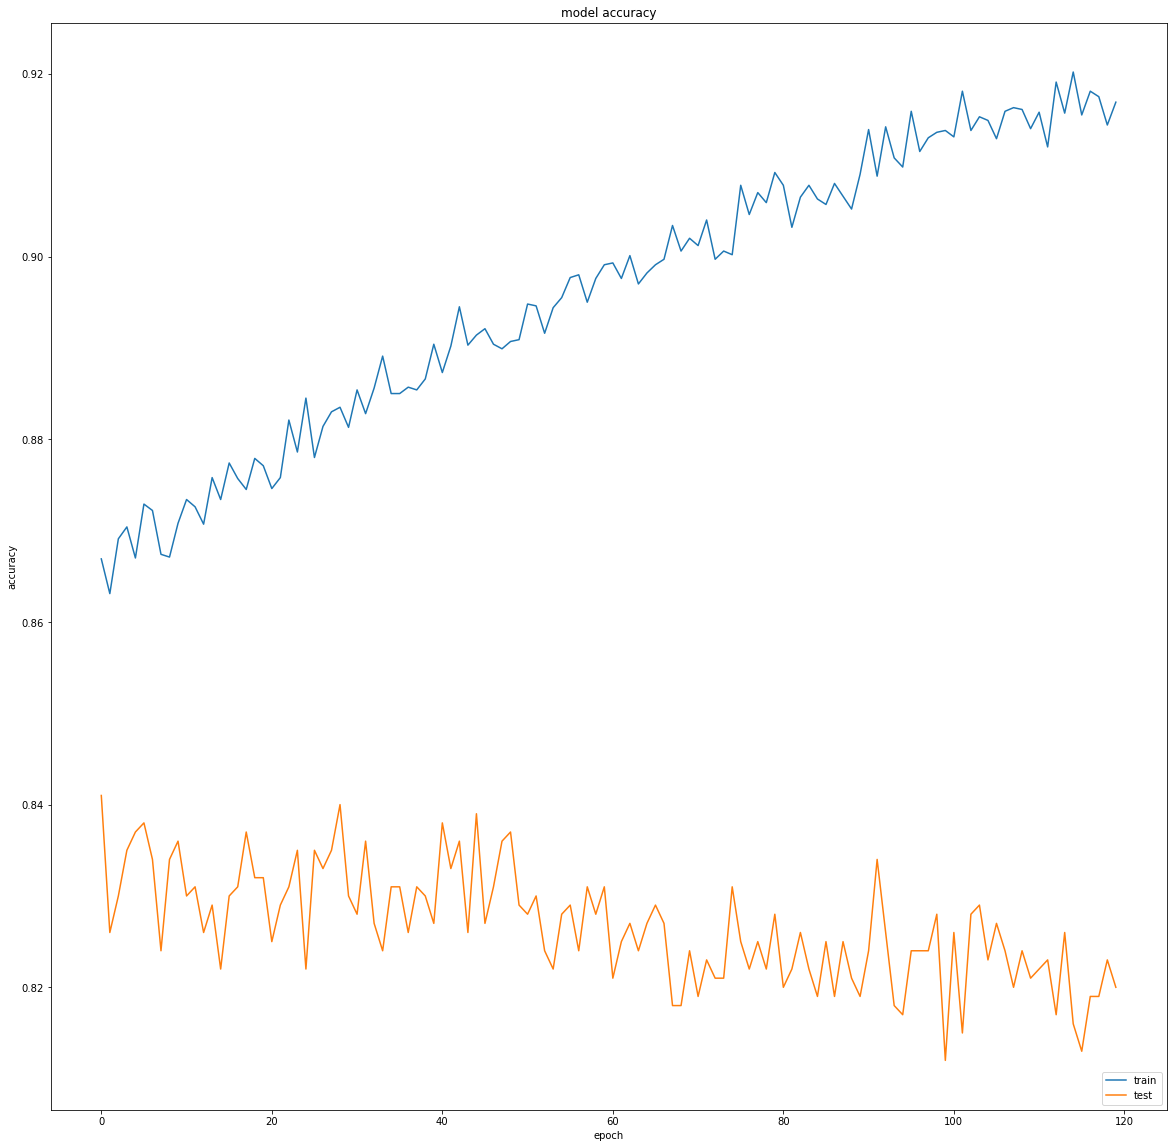

In [213]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
plt.figure(figsize=(20,20))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

### Evaluating on Given Test Set

In [214]:
model.load_weights(filename)
pred_results = model.predict(([inputs_test, queries_test]))

32/32 [==============================] - 0s 3ms/step


In [215]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [216]:
story =' '.join(word for word in test_data[0][0])
print(story)

Mary got the milk there . John moved to the bedroom .


In [217]:
query = ' '.join(word for word in test_data[0][1])
print(query)

Is John in the kitchen ?


In [218]:
print("True Test Answer from Data is:",test_data[0][2])

True Test Answer from Data is: no


In [219]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  no
Probability of certainty was:  0.9776494


## Writing Your Own Stories and Questions

Remember you can only use words from the existing vocab

Q8 use the model for predicting the given strory and question given in the problem statement

In [220]:
q8_story="Daniel went up to bedroom . John dropped the football in the Kitchen ."

q8_ask="Is the football in the Kitchen ?"

ask_data = [(q8_story.split(), q8_ask.split(),'no')]

ask_story, ask_ques, ask_ans = vectorize_stories(ask_data)

pred_results = model.predict(([ask_story,ask_ques]))
val_max = np.argmax(pred_results[0])

1/1 [==============================] - 0s 21ms/step


In [221]:
#Correct prediction!
for key,val in tokenizer.word_index.items():
    if val == val_max:
        k = key
print(k)

yes


In [222]:
pred_results[0][val_max]

0.92799735

# Thank you!